# Ordonnancement

## Cahier des charges de l'exemple principal

Tâche   | Durée | Prérequis
-----:  |:-----:|:---------
A       |  2    |
B       |  1    |
C       |  3    |
D       |  4    | A, B
E       |  1    | B, C
F       |  2    | A, D, E
G       |  3    | A, B, C, E
H       |  2    | C, F, G

**OBJECTIF** assembler un emploi du temps des tâches tel que
- chaque tâche ne début qu'après que tous ses pré requis soient complétés
- à part cela on peut effectuer des tâches en parallèle
- on veut que la totalité des tâches soient réalisé en le minimum de temps.

## Exercice

10min -> 10h30

1. Essayer d'organiser un planning.
2. Trouver un graphe sous jacent au problème.

1. On remarque que les tâches sont rangés dans l'odre alphabétique et que les prérequis sont toujours précédent dans l'alphabet. 
On peut donc constater que l'enchainement

A - B - C - D - E - F - G - H

est valide.

Il est clair que la durée $18$ n'est pas optimale.

On peut déjà clairement faire tourner A, B et C en parallèle au démarrage.

**REMARQUE** quel représentation graphique peut-on utiliser pour représenter un emploi du temps?

2. On peut d'abord organiser un graphe de la façon suivante.

- Les sommets seront les tâches.
- Une arrête relie $\alpha$ à $\beta$ lorsque $\alpha$ est un prérequis de $\beta$.

# Exercice

5min -> 10h45

Construisez le graphe orienté correspondant au cahier des charges ci-dessus.

In [1]:
import networkx as nx

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (15, 10)

In [3]:
cahier = nx.DiGraph()

In [4]:
a,b,c,d,e,f,g,h = "ABCDEFGH"
cahier.add_edges_from(
    [
        (a, d),
        (b, d),
        (b, e),
        (c, e),
        (a, f),
        (d, f),
        (e, f),
        (a, g), 
        (b, g),
        (c, g),
        (e, g),
        (c, h),
        (f, h),
        (g, h),
    ]
)

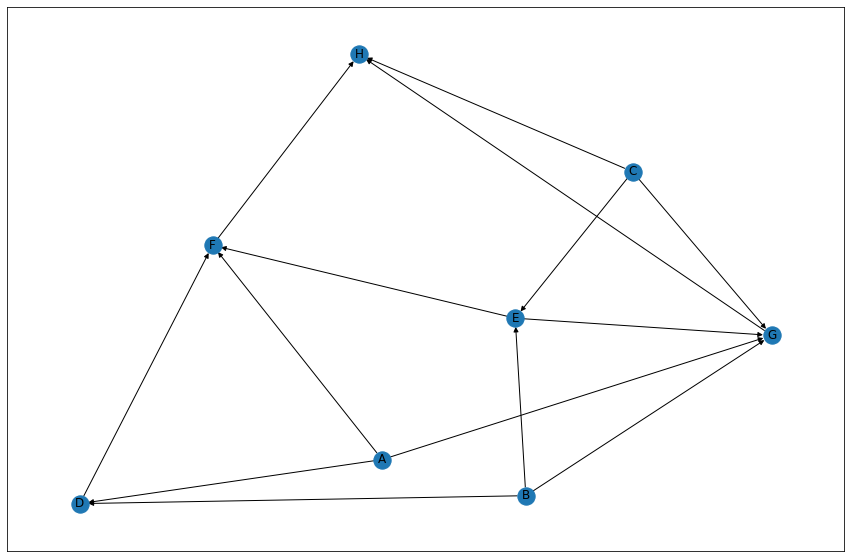

In [5]:
nx.draw_networkx(G=cahier)

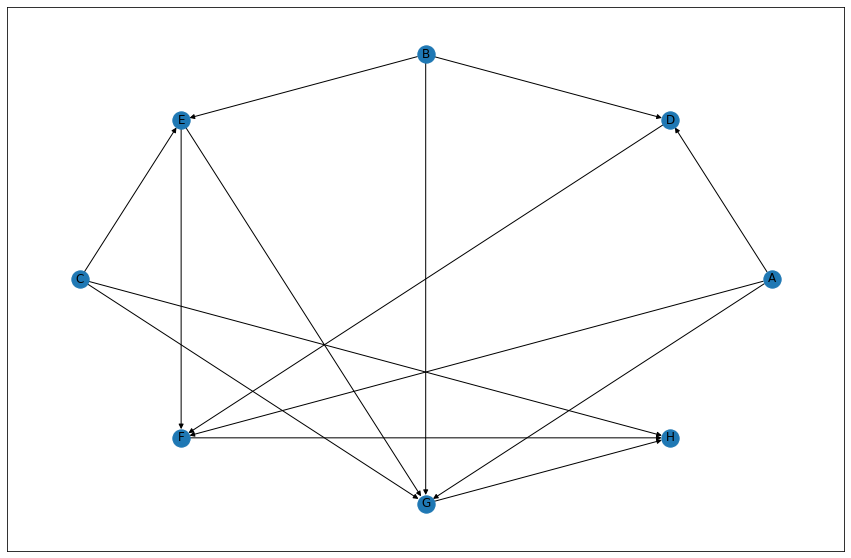

In [7]:
position = nx.circular_layout(G=cahier)
nx.draw_networkx(G=cahier, pos=position)

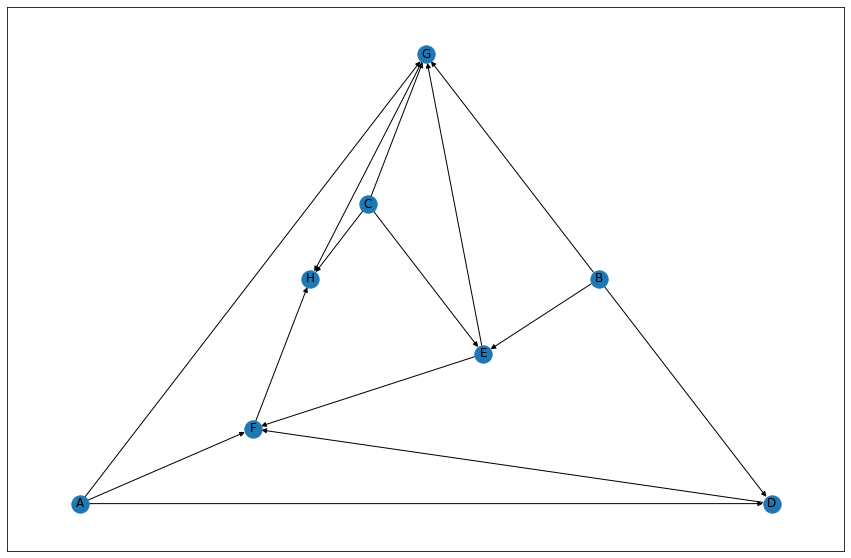

In [8]:
position = nx.planar_layout(G=cahier)
nx.draw_networkx(G=cahier, pos=position)

# Exercice

5min -> 11h

Comment détecter sur le graphe des incompatibilités dans les prérequis qui ferait qu'aucun planning n'existe?

Tâche   | Durée | Prérequis
-----:  |:-----:|:---------
A       |  2    | H
B       |  1    | 
C       |  3    | 
D       |  4    | A, B
E       |  1    | B, C
F       |  2    | A, D, E
G       |  3    | A, B, C, E
H       |  2    | C, F, G

In [9]:
cahier_2 = nx.DiGraph()
cahier_2.add_edges_from(
    [   
        (h, a),
        (a, d),
        (b, d),
        (b, e),
        (c, e),
        (a, f),
        (d, f),
        (e, f),
        (a, g), 
        (b, g),
        (c, g),
        (e, g),
        (c, h),
        (f, h),
        (g, h),
    ]
)

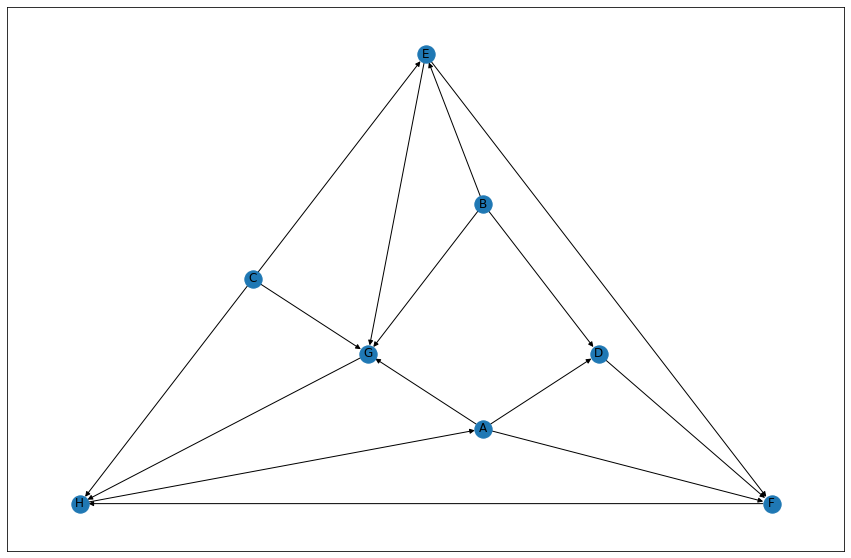

In [10]:
position = nx.planar_layout(G=cahier_2)
nx.draw_networkx(G=cahier_2, pos=position)

Une arrête représente aussi la relation transitive "être complété avant". 

Or on a un chemin circulaire 
$$A \to G \to H \to A $$
ce qui sous entend que A doit être complété avant de pouvoir commencer A. 

On a une contradiction aucun planning n'existe.

**DEFINITIONS**

- Dans un graphe un **cycle** est un chemin tel que le premier et le dernier sommets sont identiques.
- Un **DAG** (Directed Acyclic Graph) est un graphe orienté ne possédant aucun cycle.

**THEOREME** Un cahier des charges est réalisable si et seulement si son graphe associé est un **DAG**.

# Exercice

5min -> 11h15

Trouver une fonction dans `networkx` qui déterminer si un graphe est un **DAG**.

In [11]:
nx.algorithms.dag.is_directed_acyclic_graph(cahier)

True

In [12]:
nx.algorithms.dag.is_directed_acyclic_graph(cahier_2)

False

**REMARQUE** pour inclure les durées dans un graphe, on va pondérer l'arrête $(\alpha, \beta)$ par la durée de la tâche $\alpha$.

# Exercice

5 min -> 11h25

Compléter le graphe associé au premier cahier des charges.

In [13]:
cahier = nx.DiGraph()
cahier.add_weighted_edges_from(
    [   
        (a, d, 2),
        (b, d, 1),
        (b, e, 1),
        (c, e, 3),
        (a, f, 2),
        (d, f, 4),
        (e, f, 1),
        (a, g, 2), 
        (b, g, 1),
        (c, g, 3),
        (e, g, 1),
        (c, h, 3),
        (f, h, 2),
        (g, h, 3),
    ],
    weight="duree"
)

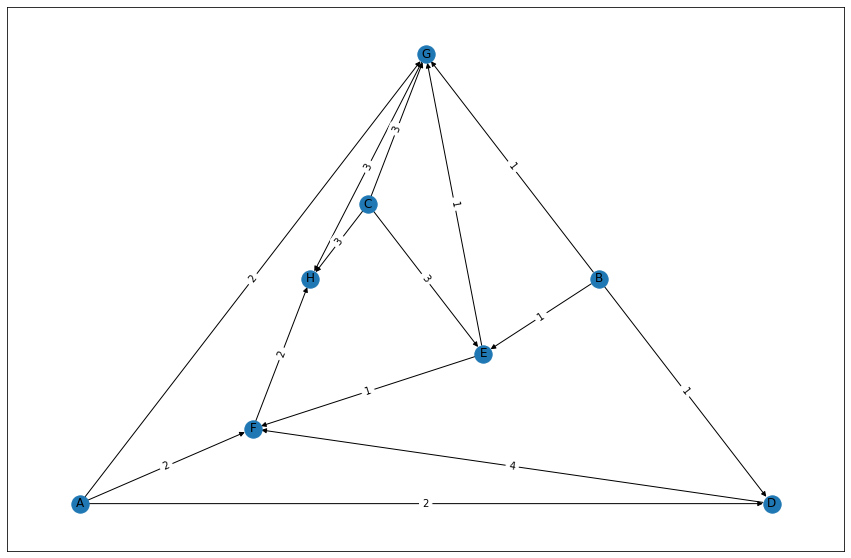

In [14]:
positions = nx.planar_layout(G=cahier)
nx.draw_networkx(G=cahier, pos=positions)
etiquettes = nx.get_edge_attributes(G=cahier, name="duree")
textes = nx.draw_networkx_edge_labels(G=cahier, pos=positions, edge_labels=etiquettes)

**REMARQUE** comme $H$ n'était requis pour aucune autre tâche on n'a pas pu inclure sa durée dans le graphe ci-dessus!

**REMARQUE** pour résoudre ce problème on va rajouter un sommet artificiel $FIN$ qui marque la fin d'un emploi tu temps.

On peut choisir de relier tous les autres sommets à $FIN$ ou juste ceux- qui ne sont pas des pré requis.

# Exercice

Ajuster la construction du graphe.

In [15]:
fin = "Fin"
cahier = nx.DiGraph()
cahier.add_weighted_edges_from(
    [   
        (a, d, 2),
        (b, d, 1),
        (b, e, 1),
        (c, e, 3),
        (a, f, 2),
        (d, f, 4),
        (e, f, 1),
        (a, g, 2), 
        (b, g, 1),
        (c, g, 3),
        (e, g, 1),
        (c, h, 3),
        (f, h, 2),
        (g, h, 3),
        (a, fin, 2),
        (b, fin, 1),
        (c, fin, 3),
        (d, fin, 4),
        (e, fin, 1),
        (f, fin, 2),
        (g, fin, 3),
        (h, fin, 2)
    ],
    weight="duree"
)

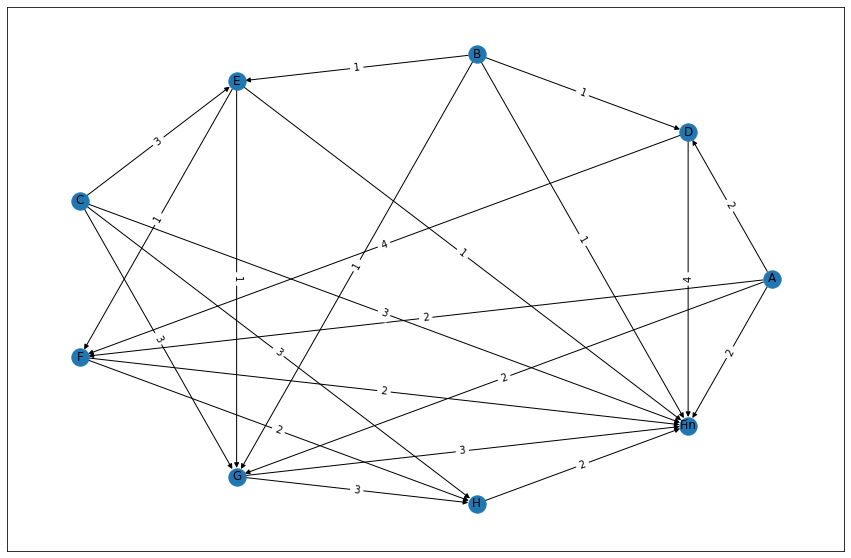

In [17]:
positions = nx.circular_layout(G=cahier)
nx.draw_networkx(G=cahier, pos=positions)
etiquettes = nx.get_edge_attributes(G=cahier, name="duree")
textes = nx.draw_networkx_edge_labels(G=cahier, pos=positions, edge_labels=etiquettes)

**THEOREME** la durée de l'emploi du temps optimal correspond à la longueur (au sens pondération) du plus long  chemin dans le graphe associé.

# Exercice

5min -> 11h45

Trouver des fonctions de `networkx` déterminant un tel chemin et la longueur associée.

In [18]:
nx.algorithms.dag.dag_longest_path(G=cahier, weight="duree")

['A', 'D', 'F', 'H', 'Fin']

In [19]:
nx.algorithms.dag.dag_longest_path_length(G=cahier, weight="duree")

10

# Résolution manuelle

Tâche   | Début | Fin
-----:  |:-----:|:---------
A       |  0    | 2
B       |  0    | 1
C       |  0    | 3
D       |  2    | 6
E       |  3    | 4
F       |  6    | 8
G       |  4    | 7
H       |  8    | 10

On a pu remplir dans l'ordre alphabétique, car les prérequis respectent cet ordre.

Et à chaque nouvelle tâche on la fait commencé au moment où le dernier (au sens de la colonne Fin) prérequis se termine.

**REMARQUE** la cohérence de l'ordre alphabétique avec la relation de prérequis était cruciale pour la résolution.

# Exercice

10 min -> 12h

1. Trouver une fonction dans `networkx.algorithms.dag` qui permette de déterminer un tel ordre.
2. Utilisez là pour résoudre le problème associé au cahier des charges ci-dessous.
3. Créez des classes `Cahier_des_charges` et `Emploi_du_temps` ainsi qu'une fonction `genere_emploi_du_temps_optimal` permettant de résoudre le problème automatiquement.

Tâche   | Durée | Prérequis
-----:  |:-----:|:---------
A       |  1.5  | F
B       |  3    | I
C       |  4    | F, I
D       |  1    | A, G, F
E       |  6    | A, B
F       |  2    | 
G       |  4.5  | B, C, F
H       |  0.5  | A, I, J
I       |  3    |
J       |  4    | D, G

In [21]:
list(nx.algorithms.dag.topological_sort(cahier))

['C', 'B', 'E', 'A', 'G', 'D', 'F', 'H', 'Fin']

In [23]:
list(nx.algorithms.dag.all_topological_sorts(cahier))

[['C', 'B', 'E', 'A', 'G', 'D', 'F', 'H', 'Fin'],
 ['C', 'B', 'E', 'A', 'D', 'F', 'G', 'H', 'Fin'],
 ['C', 'B', 'E', 'A', 'D', 'G', 'F', 'H', 'Fin'],
 ['C', 'B', 'A', 'D', 'E', 'G', 'F', 'H', 'Fin'],
 ['C', 'B', 'A', 'D', 'E', 'F', 'G', 'H', 'Fin'],
 ['C', 'B', 'A', 'E', 'G', 'D', 'F', 'H', 'Fin'],
 ['C', 'B', 'A', 'E', 'D', 'F', 'G', 'H', 'Fin'],
 ['C', 'B', 'A', 'E', 'D', 'G', 'F', 'H', 'Fin'],
 ['C', 'A', 'B', 'E', 'G', 'D', 'F', 'H', 'Fin'],
 ['C', 'A', 'B', 'E', 'D', 'F', 'G', 'H', 'Fin'],
 ['C', 'A', 'B', 'E', 'D', 'G', 'F', 'H', 'Fin'],
 ['C', 'A', 'B', 'D', 'E', 'G', 'F', 'H', 'Fin'],
 ['C', 'A', 'B', 'D', 'E', 'F', 'G', 'H', 'Fin'],
 ['B', 'A', 'D', 'C', 'E', 'G', 'F', 'H', 'Fin'],
 ['B', 'A', 'D', 'C', 'E', 'F', 'G', 'H', 'Fin'],
 ['B', 'A', 'C', 'E', 'G', 'D', 'F', 'H', 'Fin'],
 ['B', 'A', 'C', 'E', 'D', 'F', 'G', 'H', 'Fin'],
 ['B', 'A', 'C', 'E', 'D', 'G', 'F', 'H', 'Fin'],
 ['B', 'A', 'C', 'D', 'E', 'G', 'F', 'H', 'Fin'],
 ['B', 'A', 'C', 'D', 'E', 'F', 'G', 'H', 'Fin'],
